Linear Regression sử dụng Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
# n: số lượng dữ liệu 
n = 20
X = np.random.randint(low=20, high=150, size=n).reshape(-1, 1)
print(X)

[[ 36]
 [ 63]
 [ 67]
 [ 69]
 [ 54]
 [102]
 [131]
 [136]
 [ 71]
 [ 40]
 [ 94]
 [149]
 [109]
 [108]
 [121]
 [ 26]
 [140]
 [ 63]
 [ 78]
 [ 93]]


In [85]:
noise = np.random.normal(0, 1, n).reshape(-1, 1)
print(noise)

[[ 0.4771502 ]
 [ 0.79434559]
 [ 2.08719681]
 [ 1.46396775]
 [ 0.07200842]
 [ 0.31658937]
 [ 0.21705819]
 [-0.45464937]
 [ 0.25912894]
 [-0.75131197]
 [ 1.31728774]
 [ 0.64688904]
 [-0.5476105 ]
 [ 1.23106147]
 [ 1.85664935]
 [-0.60890175]
 [ 0.41232734]
 [ 1.46694272]
 [-1.09657999]
 [-0.2311826 ]]


In [86]:
y = 15*X + 8 + 25*noise
print(y)

[[ 559.92875505]
 [ 972.85863963]
 [1065.17992021]
 [1079.59919369]
 [ 819.80021039]
 [1545.91473437]
 [1978.42645466]
 [2036.63376572]
 [1079.47822361]
 [ 589.21720064]
 [1450.93219347]
 [2259.17222588]
 [1629.30973749]
 [1658.77653683]
 [1869.41623371]
 [ 382.77745623]
 [2118.30818355]
 [ 989.6735681 ]
 [1150.58550025]
 [1397.22043505]]


In [87]:
one = np.ones(n, dtype=int).reshape(-1,1)
X = np.concatenate((one, X), axis=1)
print(X)

[[  1  36]
 [  1  63]
 [  1  67]
 [  1  69]
 [  1  54]
 [  1 102]
 [  1 131]
 [  1 136]
 [  1  71]
 [  1  40]
 [  1  94]
 [  1 149]
 [  1 109]
 [  1 108]
 [  1 121]
 [  1  26]
 [  1 140]
 [  1  63]
 [  1  78]
 [  1  93]]


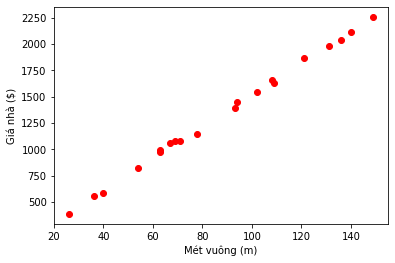

In [88]:
plt.scatter(X[:, 1], y, c='red')
plt.xlabel('Mét vuông (m)')
plt.ylabel('Giá nhà ($)')
plt.show()

In [16]:
def predict(w, X): 
  return np.dot(X, w)

In [106]:
# khởi tạo giá trị tham số cho gradient descent
w = np.array([[0.], [1.]])
print(w)

[[0.]
 [1.]]


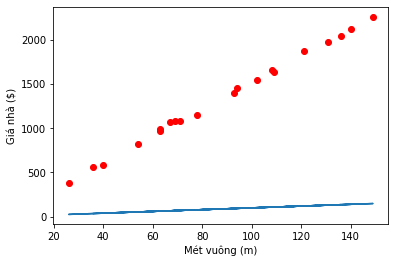

In [91]:
y_pred = predict(w, X)
plt.plot(X[:, 1], y_pred)
plt.scatter(X[:, 1], y, c='red')
plt.xlabel('Mét vuông (m)')
plt.ylabel('Giá nhà ($)')
plt.show()

In [92]:
print(y_pred)

[[ 36.]
 [ 63.]
 [ 67.]
 [ 69.]
 [ 54.]
 [102.]
 [131.]
 [136.]
 [ 71.]
 [ 40.]
 [ 94.]
 [149.]
 [109.]
 [108.]
 [121.]
 [ 26.]
 [140.]
 [ 63.]
 [ 78.]
 [ 93.]]


In [28]:
def MSELoss(y_pred, y):
  return 0.5* np.sum((y_pred-y)**2)

def gradient_descent(lr, epochs, w, threshold):
  history = []
  for i in range(epochs):
    w = w - lr * np.dot(X.T, predict(w, X)-y)
    loss = MSELoss(predict(w, X), y)
    print(f'epochs {i + 1}: w = {w}, loss = {loss}')
    history.append(loss)
    if loss <= threshold: return w
  
  return w, np.array(history)

In [108]:
learning_rate = 0.000001
epochs = 50
threshold = 1e-6

w, history = gradient_descent(learning_rate, epochs, w, threshold)

epochs 1: w = [[0.02488321]
 [3.53179139]], loss = 12138014.734061336
epochs 2: w = [[0.04533529]
 [5.61203474]], loss = 8196120.871623295
epochs 3: w = [[0.06214653]
 [7.32126419]], loss = 5534921.540482368
epochs 4: w = [[0.07596628]
 [8.72565049]], loss = 3738327.7894033706
epochs 5: w = [[0.08732808]
 [9.87956278]], loss = 2525435.140192199
epochs 6: w = [[ 0.09667031]
 [10.82767339]], loss = 1706603.0709478038
epochs 7: w = [[ 0.10435316]
 [11.6066873 ]], loss = 1153803.9767772069
epochs 8: w = [[ 0.11067258]
 [12.24676309]], loss = 780605.5517031836
epochs 9: w = [[ 0.11587174]
 [12.77268055]], loss = 528656.7586756728
epochs 10: w = [[ 0.12015044]
 [13.20479995]], loss = 358564.41610219533
epochs 11: w = [[ 0.12367284]
 [13.55985028]], loss = 243733.91942333768
epochs 12: w = [[ 0.12657384]
 [13.8515769 ]], loss = 166211.07039768057
epochs 13: w = [[ 0.12896426]
 [14.09127366]], loss = 113874.86779837654
epochs 14: w = [[ 0.13093516]
 [14.28822016]], loss = 78542.34133815882
epo

In [109]:
print(w)

[[ 0.14120719]
 [15.19475437]]


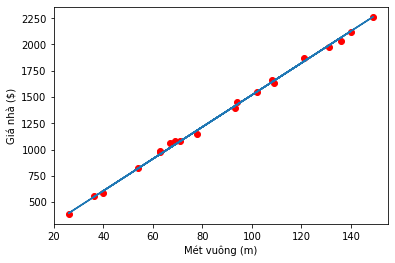

In [110]:
y_pred = predict(w, X)
plt.plot(X[:, 1], y_pred)
plt.scatter(X[:, 1], y, c='red')
plt.xlabel('Mét vuông (m)')
plt.ylabel('Giá nhà ($)')
plt.show()

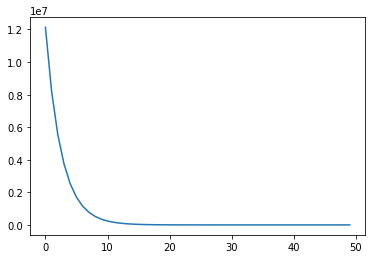

In [111]:
plt.plot(history)
plt.show()

Giả sử dữ liệu có dạng hàm bậc 2 như dưới đây: sử dụng poly regression

In [4]:
data = pd.read_csv('data\data_square.csv')

In [5]:
print(data.head())

   Diện tích  Giá nhà
0    30.0000 -100.000
1    32.4138 -190.725
2    34.8276 -269.798
3    37.2414 -337.218
4    39.6552 -392.985


In [12]:
X = data.iloc[:, 0].values.reshape(-1, 1)
print(X)

[[ 30.    ]
 [ 32.4138]
 [ 34.8276]
 [ 37.2414]
 [ 39.6552]
 [ 42.069 ]
 [ 44.4828]
 [ 46.8966]
 [ 49.3103]
 [ 51.7241]
 [ 54.1379]
 [ 56.5517]
 [ 58.9655]
 [ 61.3793]
 [ 63.7931]
 [ 66.2069]
 [ 68.6207]
 [ 71.0345]
 [ 73.4483]
 [ 75.8621]
 [ 78.2759]
 [ 80.6897]
 [ 83.1034]
 [ 85.5172]
 [ 87.931 ]
 [ 90.3448]
 [ 92.7586]
 [ 95.1724]
 [ 97.5862]
 [100.    ]]


In [13]:
y = data.iloc[:, -1].values.reshape(-1, 1)
print(y)

[[-100.    ]
 [-190.725 ]
 [-269.798 ]
 [-337.218 ]
 [-392.985 ]
 [-437.099 ]
 [-469.56  ]
 [-490.369 ]
 [-499.524 ]
 [-497.027 ]
 [-482.878 ]
 [-457.075 ]
 [-419.62  ]
 [-370.511 ]
 [-309.75  ]
 [-237.337 ]
 [-153.27  ]
 [ -57.5505]
 [  49.8216]
 [ 168.847 ]
 [ 299.524 ]
 [ 441.855 ]
 [ 595.838 ]
 [ 761.474 ]
 [ 938.763 ]
 [1127.71  ]
 [1328.3   ]
 [1540.55  ]
 [1764.45  ]
 [2000.    ]]


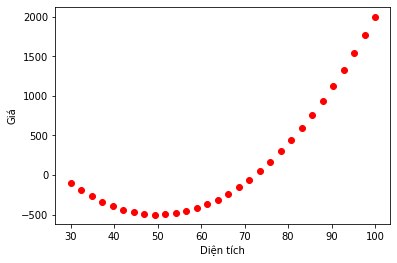

In [14]:
plt.scatter(X, y, color='red')
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

=> công thức giá nhà dự đoán theo diện tích: giá = w0 + w1 * diện tích + w2 * diện tích ** 2

In [100]:
# khởi tạo giá trị cho tham số 
w = np.array([1000., -50., 0.5]).reshape(-1, 1)
print(w)

[[ 1.e+03]
 [-5.e+01]
 [ 5.e-01]]


In [23]:
one = np.ones((np.shape(X)[0], 1))
X_square = np.array(X**2)
X = np.concatenate((one, X, X_square), axis=1)
print(X)

[[1.00000000e+00 3.00000000e+01 9.00000000e+02]
 [1.00000000e+00 3.24138000e+01 1.05065443e+03]
 [1.00000000e+00 3.48276000e+01 1.21296172e+03]
 [1.00000000e+00 3.72414000e+01 1.38692187e+03]
 [1.00000000e+00 3.96552000e+01 1.57253489e+03]
 [1.00000000e+00 4.20690000e+01 1.76980076e+03]
 [1.00000000e+00 4.44828000e+01 1.97871950e+03]
 [1.00000000e+00 4.68966000e+01 2.19929109e+03]
 [1.00000000e+00 4.93103000e+01 2.43150569e+03]
 [1.00000000e+00 5.17241000e+01 2.67538252e+03]
 [1.00000000e+00 5.41379000e+01 2.93091222e+03]
 [1.00000000e+00 5.65517000e+01 3.19809477e+03]
 [1.00000000e+00 5.89655000e+01 3.47693019e+03]
 [1.00000000e+00 6.13793000e+01 3.76741847e+03]
 [1.00000000e+00 6.37931000e+01 4.06955961e+03]
 [1.00000000e+00 6.62069000e+01 4.38335361e+03]
 [1.00000000e+00 6.86207000e+01 4.70880047e+03]
 [1.00000000e+00 7.10345000e+01 5.04590019e+03]
 [1.00000000e+00 7.34483000e+01 5.39465277e+03]
 [1.00000000e+00 7.58621000e+01 5.75505822e+03]
 [1.00000000e+00 7.82759000e+01 6.127116

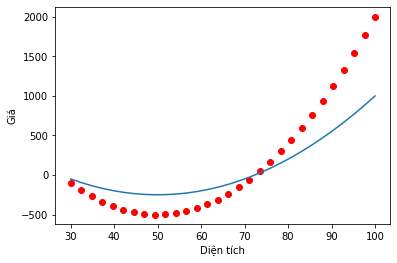

In [101]:
plt.scatter(X[:,1], y, color='red')
plt.plot(X[:, 1], predict(w, X))
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

In [102]:
learning_rate = 1e-9
epochs = 100
threshold = 1e5

w, history = gradient_descent(learning_rate, epochs, w, threshold)

epochs 1: w = [[ 1.00000000e+03]
 [-4.99996461e+01]
 [ 5.39105788e-01]], loss = 1282567.5968913764
epochs 2: w = [[ 9.99999999e+02]
 [-4.99997143e+01]
 [ 5.43882824e-01]], loss = 1269754.4504900961
epochs 3: w = [[ 9.99999996e+02]
 [-4.99998341e+01]
 [ 5.44467575e-01]], loss = 1269547.4728285458
epochs 4: w = [[ 9.99999992e+02]
 [-4.99999601e+01]
 [ 5.44540356e-01]], loss = 1269528.5001831811
epochs 5: w = [[ 9.99999988e+02]
 [-5.00000869e+01]
 [ 5.44550615e-01]], loss = 1269512.331618125
epochs 6: w = [[ 9.99999984e+02]
 [-5.00002139e+01]
 [ 5.44553238e-01]], loss = 1269496.205099677
epochs 7: w = [[ 9.99999980e+02]
 [-5.00003408e+01]
 [ 5.44554929e-01]], loss = 1269480.0794356558
epochs 8: w = [[ 9.99999977e+02]
 [-5.00004677e+01]
 [ 5.44556506e-01]], loss = 1269463.95401173
epochs 9: w = [[ 9.99999973e+02]
 [-5.00005946e+01]
 [ 5.44558069e-01]], loss = 1269447.8288187338
epochs 10: w = [[ 9.99999969e+02]
 [-5.00007215e+01]
 [ 5.44559630e-01]], loss = 1269431.7038565278
epochs 11: w 

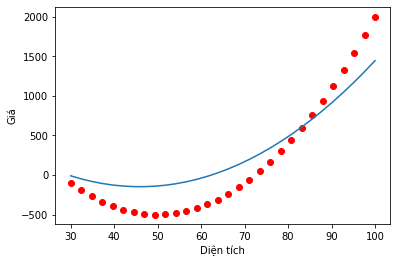

In [103]:
plt.scatter(X[:,1], y, color='red')
plt.plot(X[:, 1], predict(w, X))
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

In [76]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X, y)

LinearRegression()

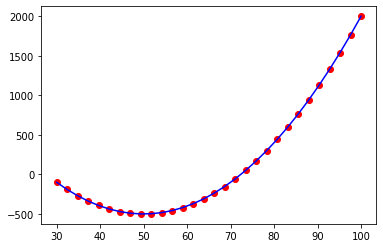

In [78]:
plt.scatter(X[:, 1], y, color='red')
plt.plot(X[:, 1], lr2.predict(X), color='blue')

plt.show()

In [88]:
lr2.coef_

array([[   0.        , -100.00022214,    1.00000199]])

In [104]:
print(MSELoss(lr2.predict(X), y))

3.909747005493193e-05
